In [1]:
# -*- coding: utf-8 -*-

# Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from matplotlib import rcParams

# Configuraciones
%matplotlib inline 
%pylab inline 

# Lectura de archivo
myData = pd.read_csv('./merge_v2.csv', sep=',', encoding='utf-8', nrows=20000000, engine='c')

# Mostrar Tabla de datos para archivo
myData.head()

Populating the interactive namespace from numpy and matplotlib


,DIRECTOR_GENERO,DIRECTOR_ID,TIEMPO,VOTO_PROMEDIO,POPULARIDAD_DETALLE,VOTO_CONTADOR,GENERO,ANIO,ID_PELICULA,POPULARIDAD,RATING_PROMEDIO,RANKING
0,2,2224,194,7.0,1.115168,1.0,99,2003,1,1.115168,3.749543,3
1,2,2224,194,7.0,1.115168,1.0,99,2003,1,1.115168,3.749543,5
2,2,2224,194,7.0,1.115168,1.0,99,2003,1,1.115168,3.749543,4
3,2,2224,194,7.0,1.115168,1.0,99,2003,1,1.115168,3.749543,4
4,2,2224,194,7.0,1.115168,1.0,99,2003,1,1.115168,3.749543,3


In [2]:
"""
Variables de estudio:

RATING_PROMEDIO
VOTO_PROMEDIO
TIEMPO
VOTO_CONTADOR
POPULARIDAD
ANIO
POPULARIDAD_DETALLE
GENERO
DIRECTOR_ID
DIRECTOR_GENERO
ID_PELICULA

Variable objetivo:

RANKING
"""
# Obtener frecuencia de peliculas y su ID en un diccionario
# counts = myData.ID_PELICULA.value_counts().to_dict()
# counts

'\nVariables de estudio:\n\nRATING_PROMEDIO\nVOTO_PROMEDIO\nTIEMPO\nVOTO_CONTADOR\nPOPULARIDAD\nANIO\nPOPULARIDAD_DETALLE\nGENERO\nDIRECTOR_ID\nDIRECTOR_GENERO\nID_PELICULA\n\nVariable objetivo:\n\nRANKING\n'

In [3]:
# Ver frecuencia de peliculas calificadas segun ID_PELICULAS
myData.ID_PELICULA.value_counts()

571      309664
4306     302584
3427     273700
3106     270862
1220     268482
30       236826
1428     227348
1180     217542
2913     214886
607      200496
313      199624
1110     197400
6287     193295
175      180900
798      162556
197      162520
1144     159690
1202     157756
3368     156426
357      154628
12232    152406
1406     148152
8782     147251
708      144762
12582    143682
8644     141073
6134     132237
2800     131400
4330     126084
6692     125479
          ...  
7950         97
10160        97
11973        95
12119        95
11791        95
6288         94
8642         93
8891         92
6261         91
6265         91
8841         90
12041        89
12559        88
6745         88
6653         88
8823         88
10026        86
6272         86
12615        86
8876         81
8202         79
6770         73
12129        71
6894         68
9979         63
6743         60
6711         57
10011        43
11838        38
12418        22
Name: ID_PELICULA, Lengt

In [4]:
# Ver numero de filas y columnas
# (filas, columnas)
myData.shape

(20000000, 12)

In [5]:
# Describir datos
myData.describe()

,DIRECTOR_GENERO,DIRECTOR_ID,TIEMPO,VOTO_PROMEDIO,POPULARIDAD_DETALLE,VOTO_CONTADOR,GENERO,ANIO,ID_PELICULA,POPULARIDAD,RATING_PROMEDIO,RANKING
count,2.000000e+07,2.000000e+07,2.000000e+07,2.000000e+07,2.000000e+07,2.000000e+07,2.000000e+07,2.000000e+07,2.000000e+07,2.000000e+07,2.000000e+07,2.000000e+07
mean,1.802044e+00,1.607974e+04,1.132192e+02,6.639374e+00,1.285341e+01,9.754849e+02,7.790416e+02,1.993777e+03,4.919311e+03,1.285341e+01,3.582264e+00,3.582262e+00
std,4.527783e-01,7.453040e+04,2.175186e+01,8.873931e-01,5.934932e+00,1.155064e+03,2.644317e+03,1.254412e+01,4.077282e+03,5.934932e+00,3.602757e-01,1.060309e+00
min,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,1.000157e+00,0.000000e+00,1.200000e+01,1.915000e+03,1.000000e+00,1.000157e+00,1.487395e+00,1.000000e+00
25%,2.000000e+00,1.158000e+03,9.800000e+01,6.100000e+00,8.698468e+00,1.770000e+02,1.800000e+01,1.990000e+03,1.110000e+03,8.698468e+00,3.372197e+00,3.000000e+00
50%,2.000000e+00,3.490000e+03,1.110000e+02,6.700000e+00,1.225251e+01,4.720000e+02,2.800000e+01,1.999000e+03,3.481000e+03,1.225251e+01,3.590587e+00,4.000000e+00
75%,2.000000e+00,1.185900e+04,1.250000e+02,7.300000e+00,1.642372e+01,1.440000e+03,3.500000e+01,2.002000e+03,8.512000e+03,1.642372e+01,3.832656e+00,4.000000e+00
max,2.000000e+00,1.701118e+06,6.600000e+02,1.000000e+01,2.941496e+01,6.269000e+03,1.077000e+04,2.005000e+03,1.264500e+04,2.941496e+01,4.504035e+00,5.000000e+00


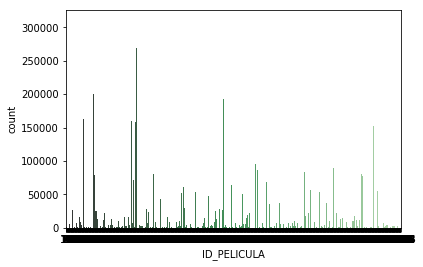

In [6]:
# Grafico sobre frecuencia v/s ID_PELICULAS
sns.countplot(x="ID_PELICULA", data=myData, palette="Greens_d")
plt.show()

In [7]:
# Numero de Peliculas
len(myData.ID_PELICULA.value_counts())

1577

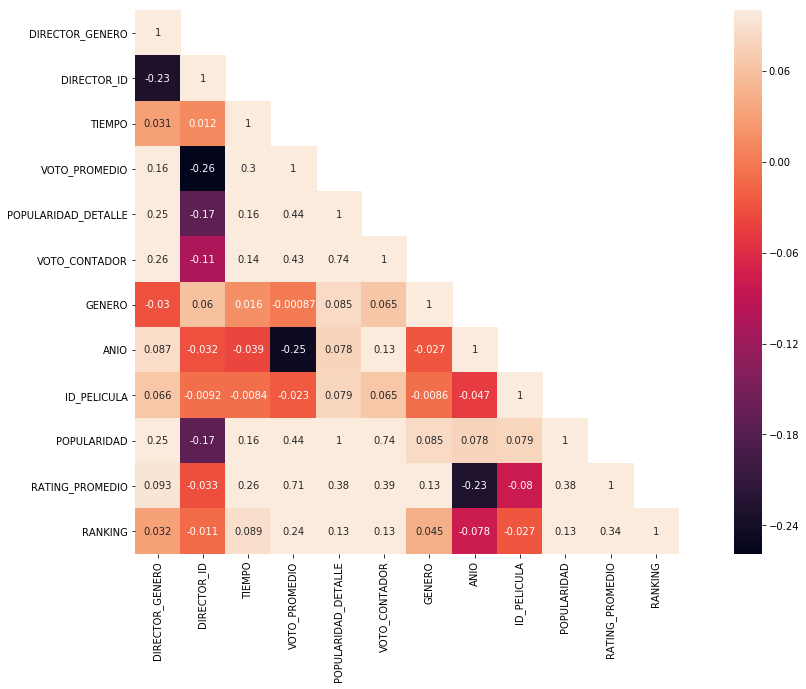

In [8]:
# Correlacion entre variables y graficar
corrvariables = myData[["DIRECTOR_GENERO", 
                        "DIRECTOR_ID", 
                        "TIEMPO", 
                        "VOTO_PROMEDIO", 
                        "POPULARIDAD_DETALLE", 
                        "VOTO_CONTADOR", 
                        "GENERO", 
                        "ANIO", 
                        "ID_PELICULA", 
                        "POPULARIDAD", 
                        "RATING_PROMEDIO", 
                        "RANKING"]].corr()
mask = np.array(corrvariables)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(corrvariables, mask=mask, vmax = .10, square = True, annot = True)
plt.show()

In [9]:
# Importar librerias para arbol de decision
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
# Obtener copia de datos pero omitiendo los campos NA
data_clean = myData.dropna()

In [11]:
# Campos a analizar y datos target
predictors = data_clean[["DIRECTOR_GENERO", "DIRECTOR_ID", "TIEMPO", "VOTO_PROMEDIO", "POPULARIDAD_DETALLE", "VOTO_CONTADOR", "GENERO", "ANIO", "ID_PELICULA", "POPULARIDAD", "RATING_PROMEDIO", "RANKING"]]
targets = data_clean.RANKING

In [12]:
# Preparamos division de datos entre entrenamiento y prueba
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size = 0.2)

In [13]:
# Se instancia el arbol de decision
classifier = DecisionTreeClassifier()
classifier = classifier.fit(pred_train, tar_train)

In [14]:
# Predecir con los datos de prueba
predictions = classifier.predict(pred_test)

In [15]:
# Obtenemos la matriz de confusion
sklearn.metrics.confusion_matrix(tar_test, predictions)

array([[ 168607,       0,       0,       0,       0],
       [      0,  409857,       0,       0,       0],
       [      0,       0, 1192535,       0,       0],
       [      0,       0,       0, 1381728,       0],
       [      0,       0,       0,       0,  847273]])

In [16]:
# Medida de acierto
sklearn.metrics.accuracy_score(tar_test, predictions)

1.0

In [17]:
# Librerias para obtener un archivo .dot con los resultados
from sklearn import tree
from io import StringIO
from IPython.display import Image

In [18]:
# Exportamos resultados a un archivo resultTree.dot
with open("resultTree.dot", "w") as f:
    f = tree.export_graphviz(classifier, out_file=f)

In [19]:
# RANDOM FOREST
# Librerias
from pandas import Series, DataFrame
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
"""
Instanciamos random forest con 25 arboles de estimacion, para luego 
contruir el modelo con los datos de entrenamiento y despues predecir los
datos de prueba. Finalmente obtenemos la matri< de confusión
"""
# Instanciamos random forest co
classifier = RandomForestClassifier(n_estimators=25)
classifier = classifier.fit(pred_train, tar_train)
predictions = classifier.predict(pred_test)
sklearn.metrics.confusion_matrix(tar_test, predictions)

In [ ]:
sklearn.metrics:accuracy_score(tar_test, predictions)

In [ ]:
# instanciamos el modelo
model = ExtraTreesClassifier()

In [ ]:
# Vemos la lista de ajustes del modelo
model.fit(pred_train, tar_train)

In [ ]:
# Revisamos la impotancia de cada variable
list(model.feature_importances_)

In [ ]:
# Grafica de importancia de cada variable
from matplotlib import pyplot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()